In [150]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import scipy.stats as ss
from scipy.optimize import curve_fit
plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
plt.rc("axes", labelsize=22)   # skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=22, top=True, direction="out")
plt.rc("ytick", labelsize=22, right=True, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=18)
plt.rcParams["figure.figsize"] = (8, 6)

In [166]:
def flatten_array(arr):
    flattened = []
    for sub in arr[:]:
        flattened = np.concatenate((flattened, sub))
    return flattened
def reject_outliers(data, x, m=5):
    idxs = abs(data - np.mean(data)) < m * np.std(data)
    return data[idxs], x[idxs]
def gaussian(x, amplitude, mean, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))
def num_of_tracks_in_vtxs(vertex_tracks_idx):
    res = []
    for event in vertex_tracks_idx:
        event_ns = []
        for vertex_tracks in event:
            n = len(vertex_tracks)
            event_ns.append(n)
        res.append(event_ns)
    return np.array(res, dtype='object')

In [3]:
file = uproot.open("OutDir_1/hist-Rel21sample.root")
tree1 = file['EventTree;1']
track_d0 = tree1['track_d0'].array(library='np')
track_z0 = tree1['track_z0'].array(library='np')
track_num_px = tree1['tracks_numPix'].array(library='np')
track_num_SCT = tree1['tracks_numSCT'].array(library='np')
track_all_si_hits = track_num_SCT+track_num_px
track_phi = tree1['track_phi'].array(library='np')
track_theta = tree1['track_theta'].array(library='np')
track_t = tree1['track_t'].array(library='np')
track_qOverP = tree1['track_qOverP'].array(library='np')
track_prob = tree1['track_prob'].array(library='np')

jet_eta = tree1['jet_eta'].array(library='np')

In [4]:
track_sin_theta = np.array([np.sin(theta) for theta in track_theta], dtype='object')
track_eta = np.array([-np.log(np.tan(theta/2)) for theta in track_theta], dtype='object')
track_pT = track_sin_theta/track_qOverP

track_pT_flat = flatten_array(track_pT)
track_eta_flat = flatten_array(track_eta)
track_num_px_flat = flatten_array(track_num_px)

(0.0, 26.0)

findfont: Font family ['Helvetica', 'Arial'] not found. Falling back to DejaVu Sans.


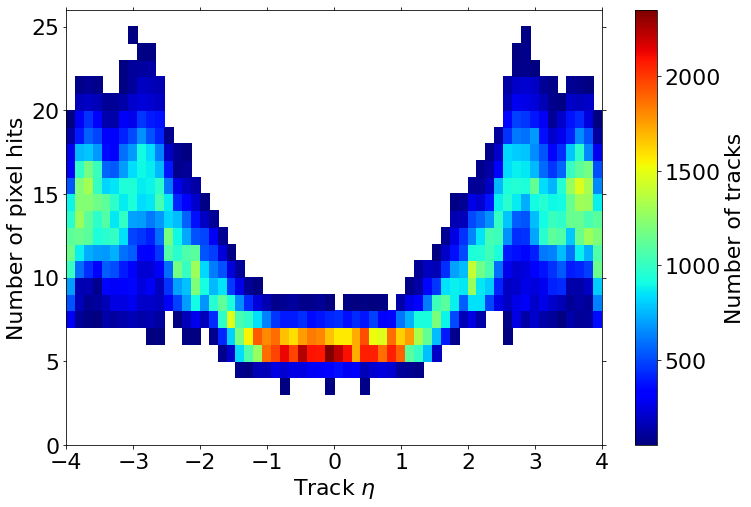

In [5]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 8)

hist = ax.hist2d(track_eta_flat, track_num_px_flat, bins=(60, 27), cmin=50, cmap='jet')
fig.colorbar(cm.ScalarMappable(norm = Normalize(np.nanmin(hist[0]), np.nanmax(hist[0])), cmap='jet'), ax=ax, label='Number of tracks')
ax.set_xlabel('Track $\\eta$')
ax.set_ylabel('Number of pixel hits')

ax.set_xlim(-4, 4)
ax.set_ylim(0, 26)

(0.0, 32.0)

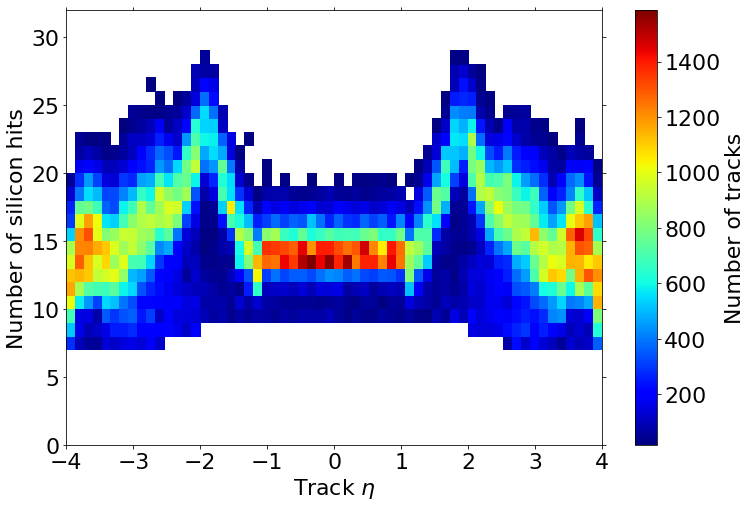

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 8)

hist = ax.hist2d(track_eta_flat, flatten_array(track_all_si_hits), bins=(60, 26), cmin=18, cmap='jet')
fig.colorbar(cm.ScalarMappable(norm = Normalize(np.nanmin(hist[0]), np.nanmax(hist[0])), cmap='jet'), ax=ax, label='Number of tracks')
ax.set_xlabel('Track $\\eta$')
ax.set_ylabel('Number of silicon hits')

ax.set_xlim(-4, 4)
ax.set_ylim(0, 32)

(0.0, 1.0)

findfont: Font family ['Helvetica', 'Arial'] not found. Falling back to DejaVu Sans.


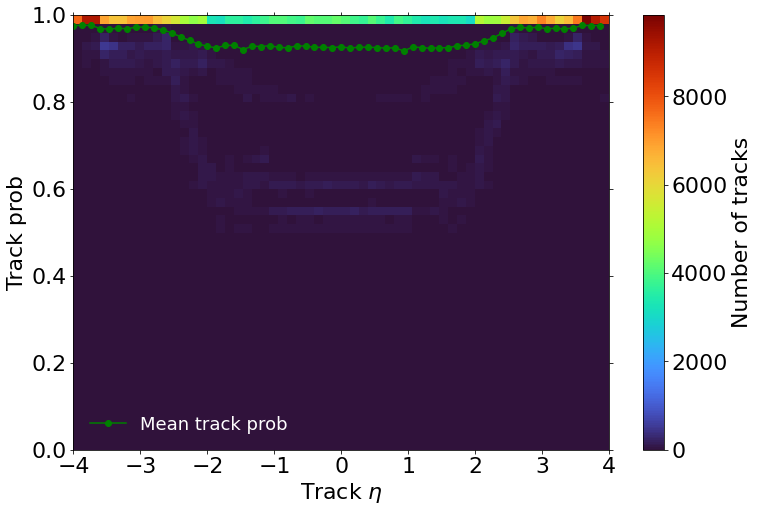

In [7]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 8)

hist = ax.hist2d(track_eta_flat, flatten_array(track_prob), bins=(60, 100), cmin=0, cmap='turbo')
fig.colorbar(cm.ScalarMappable(norm = Normalize(np.nanmin(hist[0]), np.nanmax(hist[0])),      cmap='turbo'), ax=ax, label='Number of tracks')

etas = hist[1]
mean_track_prob = []
for bin in hist[0]:
    mean_prob = np.nansum(hist[2][:-1]*bin)/np.nansum(bin)
    
    mean_track_prob.append(mean_prob)
ax.plot(etas[:-1], mean_track_prob, 'og-', label='Mean track prob')

ax.legend(frameon=False, labelcolor='white')
ax.set_xlabel('Track $\\eta$')
ax.set_ylabel('Track prob')

ax.set_xlim(-4, 4)
ax.set_ylim(0, 1)

<ipython-input-179-4bf20b5983bc>:13: RuntimeWarning: invalid value encountered in double_scalars
  mean_prob = np.nansum(hist[2][:-1]*bin)/np.nansum(bin)


(0.0, 1.0)

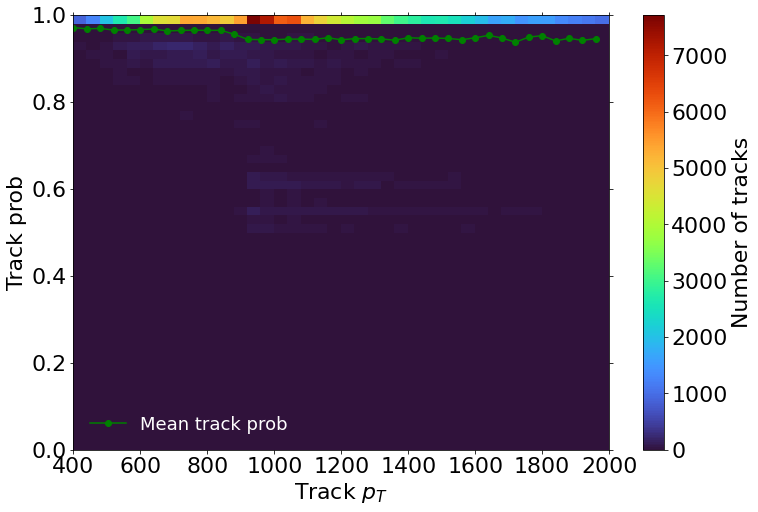

In [179]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 8)

pT_range = 2e3
idxs = np.abs(track_pT_flat) < pT_range

hist = ax.hist2d(track_pT_flat[idxs], flatten_array(track_prob)[idxs], bins=(100, 100), cmin=0, cmap='turbo')
fig.colorbar(cm.ScalarMappable(norm = Normalize(np.nanmin(hist[0]), np.nanmax(hist[0])),      cmap='turbo'), ax=ax, label='Number of tracks')

etas = hist[1]
mean_track_prob = []
for bin in hist[0]:
    mean_prob = np.nansum(hist[2][:-1]*bin)/np.nansum(bin)
    
    mean_track_prob.append(mean_prob)
ax.plot(etas[:-1], mean_track_prob, 'og-', label='Mean track prob')

ax.legend(frameon=False, labelcolor='white')
ax.set_xlabel('Track $p_T$')
ax.set_ylabel('Track prob')

ax.set_xlim(400, pT_range)
ax.set_ylim(0, 1)

(400.0, 2000.0)

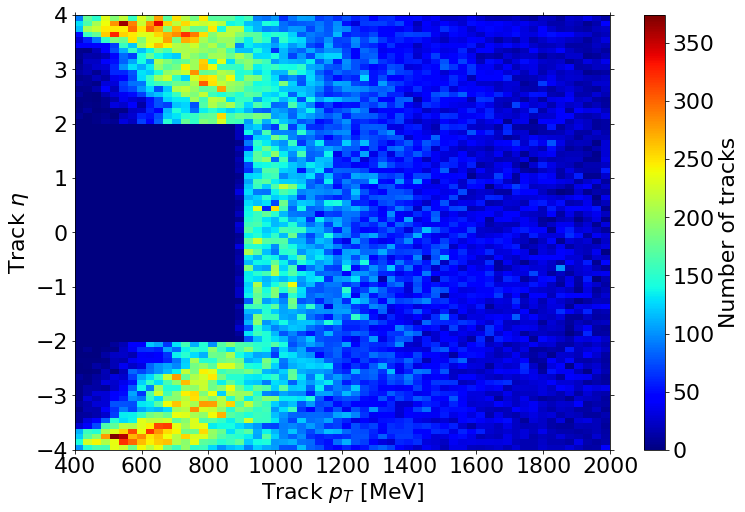

In [170]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 8)

pT_range = 2e3

idxs = np.abs(track_pT_flat) < pT_range

hist = ax.hist2d(np.abs(track_pT_flat[idxs]), track_eta_flat[idxs], bins=(60, 80), cmap='jet')
fig.colorbar(cm.ScalarMappable(norm = Normalize(np.nanmin(hist[0]), np.nanmax(hist[0])), cmap='jet'), ax=ax, label='Number of tracks')
ax.set_ylabel('Track $\\eta$')
ax.set_xlabel('Track $p_T$ [MeV]')

ax.set_ylim(-4, 4)
ax.set_xlim(400, pT_range)

(0.0, 26.0)

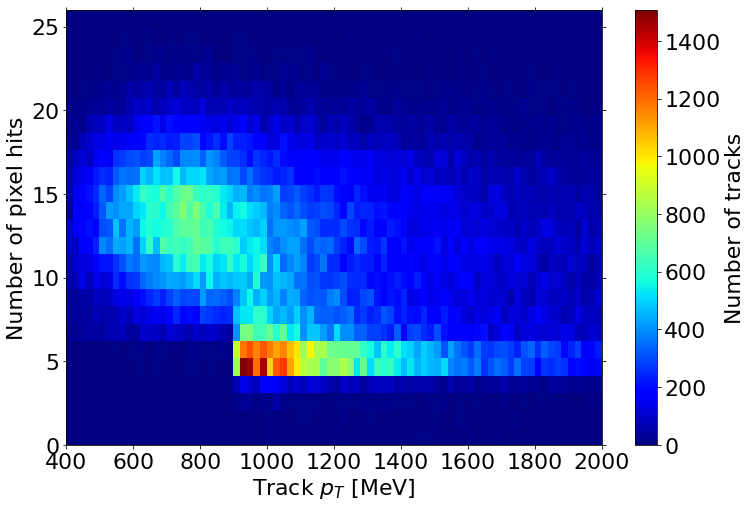

In [172]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 8)

pT_range = 2e3

idxs = np.abs(track_pT_flat) < pT_range

hist = ax.hist2d(np.abs(track_pT_flat[idxs]), track_num_px_flat[idxs], bins=(80, 26), cmap='jet')
fig.colorbar(cm.ScalarMappable(norm = Normalize(np.nanmin(hist[0]), np.nanmax(hist[0])), cmap='jet'), ax=ax, label='Number of tracks')
ax.set_xlabel('Track $p_T$ [MeV]')
ax.set_ylabel('Number of pixel hits')

ax.set_xlim(400, pT_range)
ax.set_ylim(0, 26)

In [60]:
## Number of tracks in vertex
recovertex_isHS         = tree1['recovertex_isHS'].array(library='np')
recovertex_tracks_idx   = tree1['recovertex_tracks_idx'].array(library='np')
truthvertex_tracks_idx  = tree1['truthvertex_tracks_idx'].array(library='np')


reco_n_tracks = num_of_tracks_in_vtxs(recovertex_tracks_idx)
truth_n_tracks = num_of_tracks_in_vtxs(truthvertex_tracks_idx)

In [142]:
track_pt_sum_all = []
track_HS_pt_sum_all = []

for event in range(179):
    event_pt_sum = []
    event_HS_sum_pt = []
    for vtx_idx, (track_ids, isHS) in enumerate(zip(recovertex_tracks_idx[event], recovertex_isHS[event])):
        track_pt_sum = np.sum(track_pT[event][track_ids])
        # if(track_sum_pt == 0):
        #     print(event, vtx_idx)
        if isHS:
            event_HS_sum_pt.append(track_pt_sum)
        event_pt_sum.append(track_pt_sum)
    track_pt_sum_all.append(event_pt_sum)
    track_HS_pt_sum_all.append(event_HS_sum_pt)
    # print(np.mean(sum_pt), np.std(sum_pt), np.min(sum_pt), np.max(sum_pt), np.min(np.abs(sum_pt)))
track_pt_sum_all_flat = flatten_array(track_pt_sum_all)
track_HS_pt_sum_all_flat = flatten_array(track_HS_pt_sum_all)

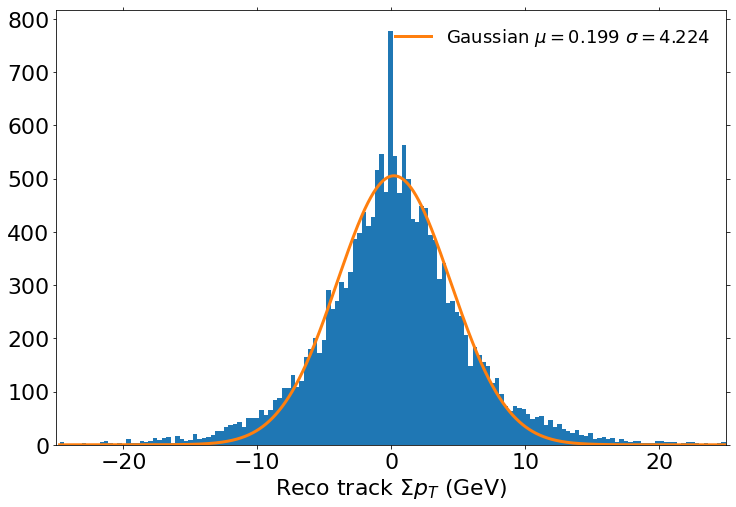

In [165]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 8)

sum_pT_range = 25

# _ = plt.hist(1e-3*track_HS_pt_sum_all_flat[1e-3*np.abs(track_HS_pt_sum_all_flat) < sum_pT_range], bins=10)
#Histogram and fit to gaussian
bin_heights, bin_borders, _ = ax.hist(1e-3*track_pt_sum_all_flat[1e-3*np.abs(track_pt_sum_all_flat) < sum_pT_range], bins=150)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[400., 0., 4.])

#Plot fit
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
ax.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), lw=3, label='Gaussian $\\mu=${:.3f} $\\sigma=${:.3f}'.format(popt[1], popt[2]))

ax.set_xlabel('Reco track $\Sigma p_T$ (GeV)')
ax.set_xlim(-sum_pT_range, sum_pT_range)
ax.legend(frameon=False)

Text(0.5, 0, 'Pixel hits')

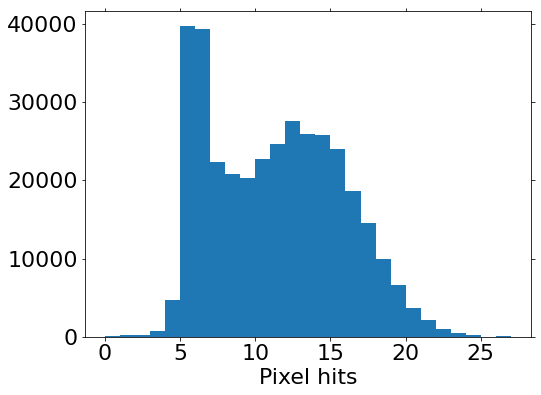

In [ ]:
_ = plt.hist(flatten_array(track_num_px), bins=27)
plt.xlabel('Pixel hits')

Text(0.5, 0, 'Track $\\eta$')

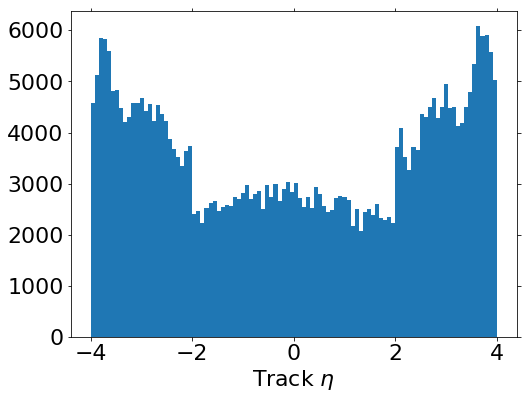

In [ ]:
_ = plt.hist(flatten_array(track_eta), bins=100)
plt.xlabel('Track $\\eta$')

In [ ]:
jet_eta_flattened = jet_eta[0]
for j_eta in jet_eta[1:]:
    jet_eta_flattened = np.concatenate((jet_eta_flattened, j_eta))
    
track_theta_flattened = track_theta[0]
for t_theta in track_theta[1:]:
    track_theta_flattened = np.concatenate((track_theta_flattened, t_theta))

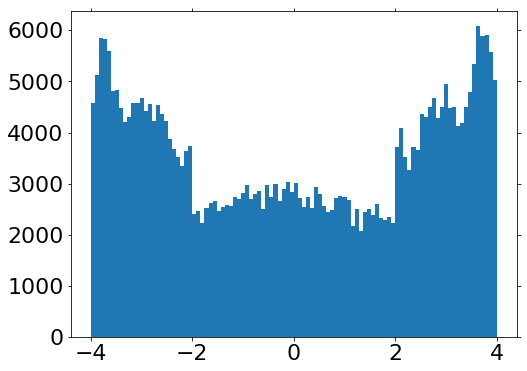

In [ ]:
_ = plt.hist(-np.log(np.tan(track_theta_flattened/2)), bins=100)

(-1.0, 1.0)

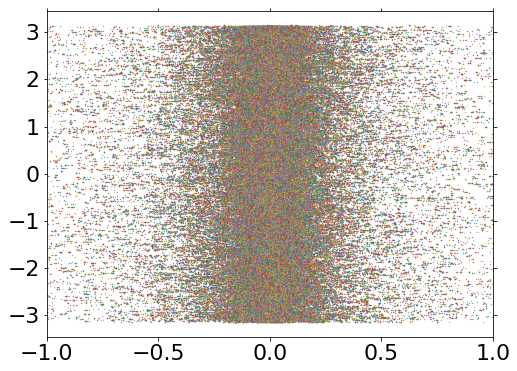

In [ ]:
for d0, phi in zip(track_d0, track_phi):
    plt.scatter(d0, phi, s=0.1)
plt.xlim(-1, 1)

(-1.0, 1.0)

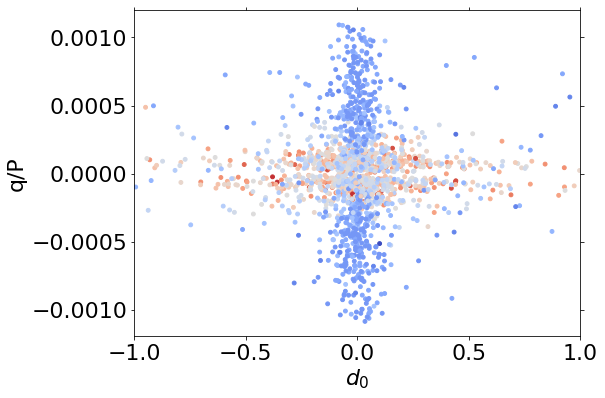

In [ ]:
n = 10
plt.scatter(track_d0[n], track_qOverP[n], s=15, c=track_num_px[n], cmap='coolwarm')
plt.xlabel('$d_0$')
plt.ylabel('q/P')
plt.xlim(-1, 1)

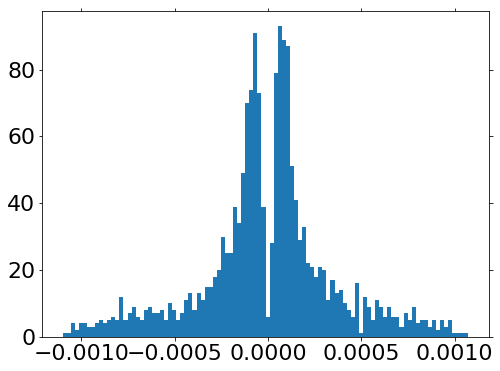

In [ ]:
_ = plt.hist(track_qOverP[0], bins=100)

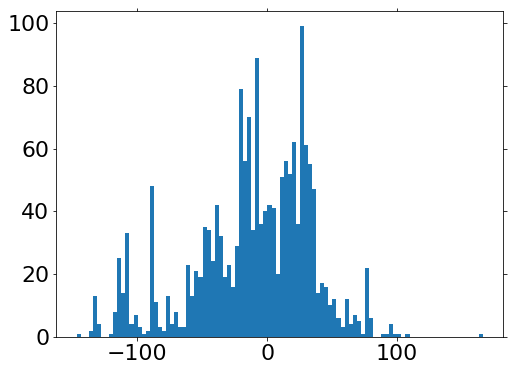

In [ ]:
_ = plt.hist(track_z0[0], bins=100)

(-120.0, 110.0)

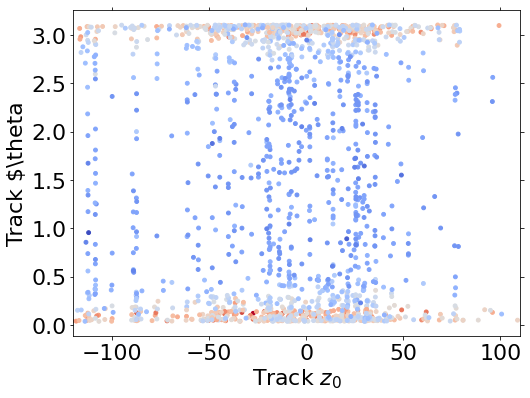

In [ ]:
plt.scatter(track_z0[0], track_theta[0], s=15, c=track_num_px[0], cmap='coolwarm')
# plt.scatter(track_z0[0], -np.log(np.tan(track_theta[0]/2)), s=15, c=track_num_px[0], cmap='coolwarm')

plt.xlabel('Track $z_0$')
plt.ylabel('Track $\\theta')

plt.xlim(-120, 110)

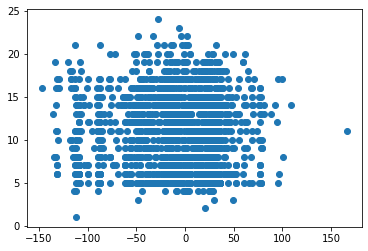

In [ ]:
plt.scatter(track_z0, track_num_px)

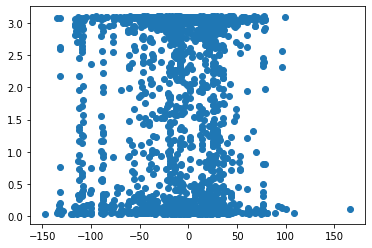

In [ ]:
plt.scatter(file['EventTree;1']['track_z0'].array()[0], file['EventTree;1']['track_theta'].array()[0])

In [ ]:
file['EventTree;1']['track_z0']

<TBranchElement 'track_z0' at 0x7f671068a910>

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

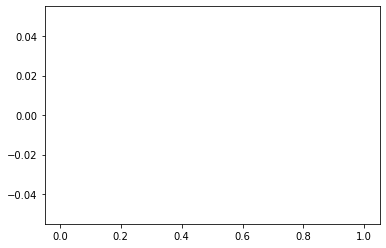

In [ ]:
plt.hist(file['EventTree;1']['track_z0'])